In [1]:
import numpy as np
import matplotlib.pyplot as plt
import corner as corner


import utils as ut

%reload_ext autoreload
%autoreload 2

/home/mpieroni/.pyenv/versions/3.10.9/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ls KL_data

1000/                        gaussian_mixture_600_10.npz
gaussian_mixture_141_10.npz  gaussian_mixture_91_10.npz
gaussian_mixture_411_10.npz  two_moons_600_10.npz


In [3]:
num_epochs = 411
check_every = 10
example_name = "gaussian_mixture"

In [4]:
data = np.load('KL_data/'+example_name + f"_{num_epochs}_{check_every}.npz")

Text(0.5, 1.0, '411 epochs')

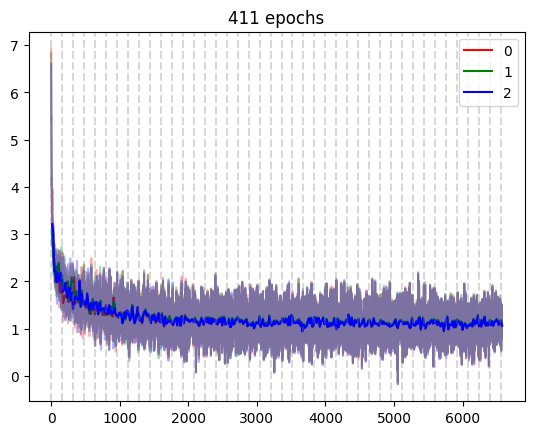

In [5]:
ut.plot_losses(data['train'], data['val'], check_every)  
plt.title(str(num_epochs)+' epochs') 

In [41]:
data['KL'].shape

(41, 3)

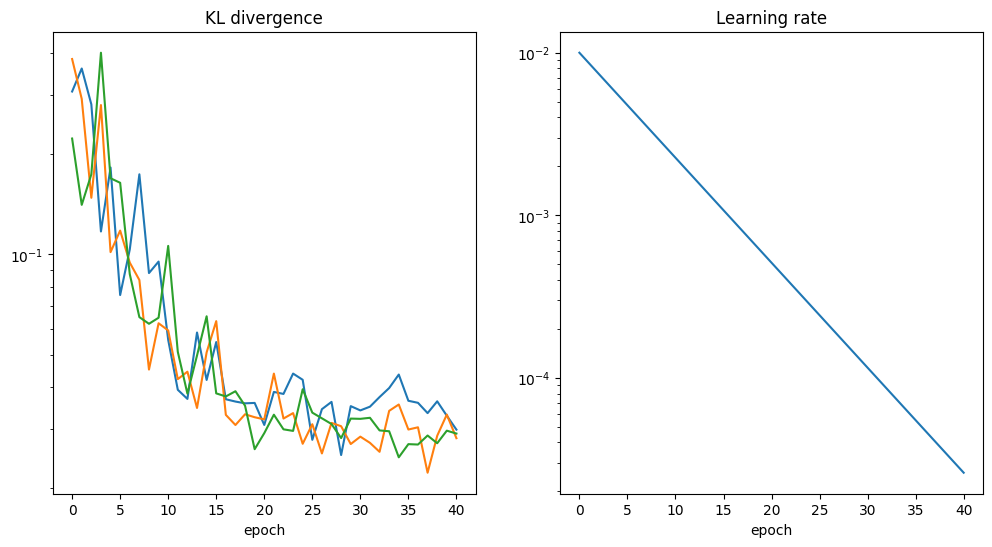

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

for i in range(data['KL'].shape[1]):
    ax[0].plot(data['KL'][:,i], label=f"{i}")

ax[0].set_title('KL divergence')
ax[0].set_xlabel('epoch')
ax[0].set_yscale('log')

x = np.arange(data['KL'].shape[0])
ax[1].plot(1e-2 * .8**(x/1.5) )
ax[1].set_title('Learning rate')
ax[1].set_xlabel('epoch')
ax[1].set_yscale('log')


In [58]:
import sbibm

i_obs = 8

example_name = "gaussian_mixture"
task = sbibm.get_task(example_name)
prior = task.get_prior_dist()
simulator = task.get_simulator()
observation = task.get_observation(num_observation=i_obs+1)
data_test = np.array(task.get_reference_posterior_samples(num_observation=i_obs+1))

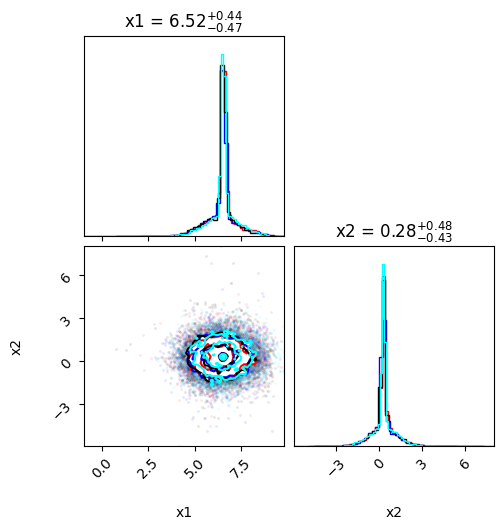

In [59]:
fig = corner.corner(data['post_samples'][i_obs,0], labels=['x1', 'x2'], show_titles=True, color='red', bins=50, smooth=.5, hist_kwargs={'density': True});

fig = corner.corner(data['post_samples'][i_obs,1], labels=['x1', 'x2'], show_titles=True, color='blue', fig=fig, bins=50, smooth=.5, hist_kwargs={'density': True});

corner.corner(data['post_samples'][i_obs,2], labels=['x1', 'x2'], show_titles=True, color='black', fig=fig, bins=50, smooth=.5, hist_kwargs={'density': True});

corner.corner(data_test, labels=['x1', 'x2'], show_titles=True, color='cyan', fig=fig, bins=50, smooth=.5, hist_kwargs={'density': True});

In [34]:
from sklearn.neighbors import KernelDensity

# Estimate the PDFs using Kernel Density Estimation (KDE)
kde_p = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(data['post_samples'][i_obs,0])
kde_q = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(data['post_samples'][i_obs,1])
kde_t = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(data_test)
# Evaluate the log densities on a grid
log_p = kde_p.score_samples(data_test)
log_q = kde_q.score_samples(data_test)
log_test = kde_t.score_samples(data_test)

log_pp = kde_p.score_samples(data['post_samples'][i_obs,0])
log_test_p = kde_t.score_samples(data['post_samples'][i_obs,0])

log_qq = kde_q.score_samples(data['post_samples'][i_obs,1])
log_test_q = kde_t.score_samples(data['post_samples'][i_obs,1])
# Compute the KL divergence
kl_divergence_p = .5* (np.mean(log_p - log_test) + np.mean(log_test_p - log_pp))
kl_divergence_q = .5* (np.mean(log_q - log_test) + np.mean(log_test_q - log_qq))

print(f"KL Divergence p: {kl_divergence_p}")
print(f"KL Divergence q: {kl_divergence_q}")

KL Divergence p: -0.1766003432498255
KL Divergence q: -0.15880755272450198
